# **Coffee Shop Sales Analysis**

**Anggota Kelompok:**
1. Bagas Eko Tjahyono Putro - 1301223279
2. Arief Muhammad Usry - 1301223069
3. Ghazy Fadhal Ramadhan - 1301223359


# 1. Import Library dan Memuat Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sanfla/Cofee_Sales_Analysis/refs/heads/main/Project.csv')
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


# 2. Eksplorasi Data

> Bagian ini bertujuan untuk memahami karakteristik data secara umum sebelum melakukan analisis lebih lanjut.



In [ ]:
data.tail()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
149111,129465,14-06-2023,08:34:10,5,Lower Manhattan,41,4,4.25,17.0,Coffee,Barista Espresso,Cappuccino,Large,June,Wednesday,8,6,2
149112,133523,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,133674,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,133744,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5
149115,149043,30-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Friday,11,6,4


In [ ]:
data.shape

(149116, 18)

In [ ]:
cols = ['store_location', 'transaction_qty', 'unit_price', 'Total_Bill', 'product_category', 'Size', 'Month Name', 'Day Name', 'Hour']

for i in cols:
    print(i)
    print(data[i].unique())
    print("*" * 100)

store_location
['Astoria' 'Lower Manhattan' "Hell's Kitchen"]
****************************************************************************************************
transaction_qty
[1 2 3 4 8 6]
****************************************************************************************************
unit_price
[ 3.    2.5   3.75  3.5   3.25  4.5   0.8   8.95  4.38  4.06  5.63  4.69
  2.65  9.25 10.95  9.5  13.33  6.4   7.6  28.   23.   12.   14.   14.75
 20.45 10.   22.5  45.   19.75 15.   21.   18.    4.75  4.    2.55  3.1
  2.45  2.1   2.2   2.    4.25]
****************************************************************************************************
Total_Bill
[  3.     2.5    3.75   3.5    3.25   4.5    0.8    8.95   4.38   4.06
   5.63   4.69   2.65   9.25  10.95   9.5   13.33   6.4    7.6   28.
  23.    12.    14.    14.75  20.45  10.    22.5   45.    19.75  15.
  21.    18.     4.75   4.     2.55   3.1    2.45   2.1    2.2    2.
   4.25   8.     6.2    5.1    6.     5.     9.     7. 

In [ ]:
data.nunique()

,0
transaction_id,149116
transaction_date,181
transaction_time,25762
store_id,3
store_location,3
product_id,80
transaction_qty,6
unit_price,41
Total_Bill,75
product_category,9


In [ ]:
data.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
store_id,0
store_location,0
product_id,0
transaction_qty,0
unit_price,0
Total_Bill,0
product_category,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [ ]:
data.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


# 3. Pra-Pemrosesan Data

> Di sini, data dibersihkan dan diubah formatnya agar siap untuk dianalisis.

In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], dayfirst=True)
data['weekday'] = data['transaction_date'].dt.day_name()
data.loc[data['Total_Bill'] == 360, 'Total_Bill'] = 36

# 4. Analisis dan Visualisasi

Sisa kode berfokus pada analisis berbagai aspek penjualan kopi, seperti:

* **Aspek Ekonomi:** Menghitung total pesanan, produk terjual, pendapatan, dan pendapatan rata-rata per pesanan.

* **Pendapatan Bulanan:** Memvisualisasikan pendapatan bulanan menggunakan diagram batang.

* **Persentase Penjualan Kategori Produk:** Memvisualisasikan persentase penjualan berdasarkan kategori produk menggunakan diagram batang horizontal.

* **Distribusi Penjualan Berdasarkan Ukuran:** Memvisualisasikan distribusi penjualan berdasarkan ukuran produk menggunakan diagram lingkaran.

* **Pendapatan Harian:** Memvisualisasikan pendapatan harian menggunakan diagram garis.

* **Penjualan Toko Teratas Berdasarkan Hari:** Memvisualisasikan penjualan toko teratas berdasarkan hari menggunakan heatmap.

* **5 Produk Terlaris:** Memvisualisasikan 5 produk terlaris menggunakan diagram batang horizontal.

* **Total Penjualan Berdasarkan Lokasi Toko:** Memvisualisasikan total penjualan berdasarkan lokasi toko menggunakan diagram batang.

* **Total Penjualan Berdasarkan Jam:** Memvisualisasikan total penjualan berdasarkan jam dalam sehari menggunakan diagram garis.

* **Kuantitas vs. Total Tagihan:** Memvisualisasikan hubungan antara kuantitas dan total tagihan menggunakan scatter plot.

* **Distribusi Jumlah Tagihan:** Memvisualisasikan distribusi jumlah tagihan menggunakan histogram.



In [ ]:
weekly_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data["Day Name"] = pd.Categorical(data["Day Name"], categories=weekly_order, ordered=True)

month_order = ["January", "February", "March", "April", "May", "June"]
data["Month Name"] = pd.Categorical(data["Month Name"], categories=month_order, ordered=True)

In [ ]:
total_orders = data['transaction_id'].nunique()

total_products = data['transaction_qty'].sum()

total_revenue = data['Total_Bill'].sum()

average_order_revenue = total_revenue / total_orders

print(f"Total Orders: {total_orders}")
print(f"Total Products Sold: {total_products}")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Average Revenue per Order: {average_order_revenue:,.2f}")

Total Orders: 149116
Total Products Sold: 214470
Total Revenue: 695,572.33
Average Revenue per Order: 4.66


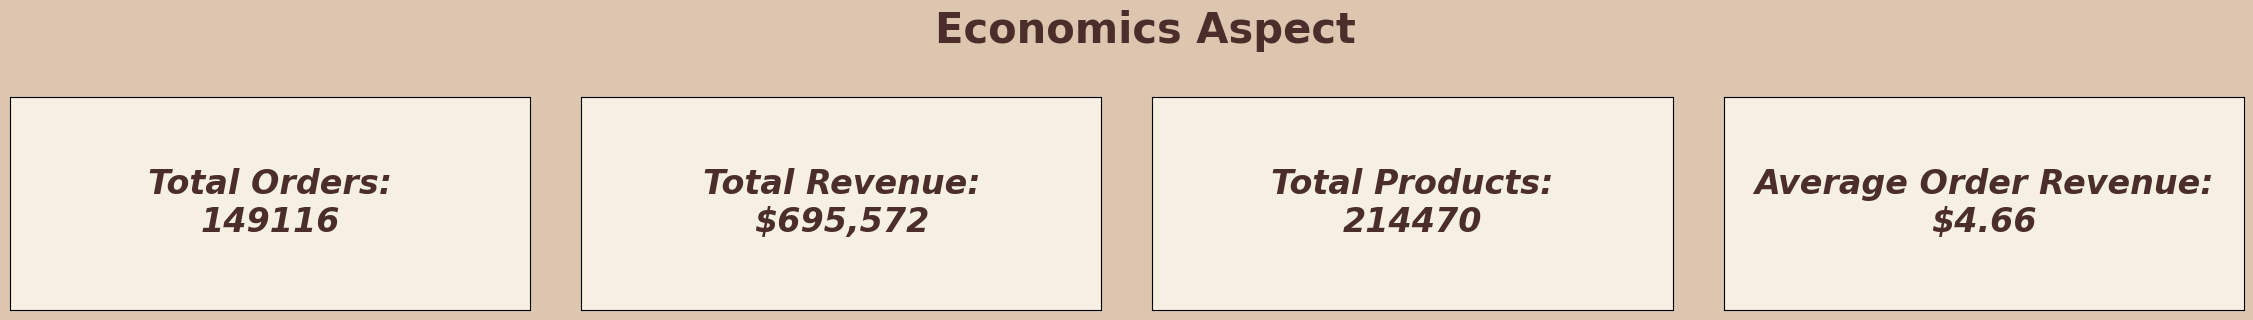

In [ ]:
fig = plt.figure(figsize=(23, 3))
fig.patch.set_facecolor("#DCC6B0")
fig.suptitle("Economics Aspect",
             fontsize=30, fontweight='bold', color="#4B2E2B", y=1.05)

ax = [None for _ in range(4)]

for i in range(4):
    ax[i] = plt.subplot2grid((1, 4), (0, i), facecolor="#F5F0E1")

text_color = "#4B2E2B"

ax[0].text(0.5, 0.5, f"Total Orders:\n{data.shape[0]}",
           fontsize=24, ha='center', va='center', fontweight="bold", color=text_color, style="italic")

ax[1].text(0.5, 0.5, f"Total Revenue:\n${data['Total_Bill'].sum():,.0f}",
           fontsize=24, ha='center', va='center', fontweight="bold", color=text_color, style="italic")

ax[2].text(0.5, 0.5, f"Total Products:\n{data['transaction_qty'].sum()}",
           fontsize=24, ha='center', va='center', fontweight="bold", color=text_color, style="italic")

average_revenue = data["Total_Bill"].sum() / data.shape[0]
ax[3].text(0.5, 0.5, f"Average Order Revenue:\n${average_revenue:.2f}",
           fontsize=24, ha='center', va='center', fontweight="bold", color=text_color, style="italic")

for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("")

fig.tight_layout()


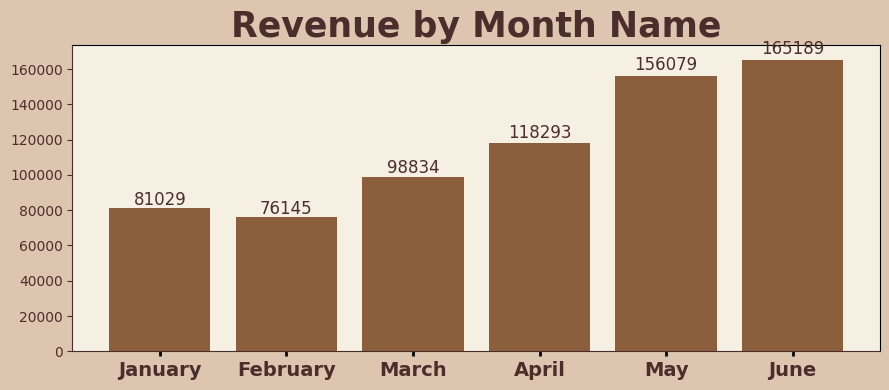

In [ ]:
month_data = data.groupby("Month Name", observed=True)["Total_Bill"].sum()

fig, ax = plt.subplots(figsize=(9, 4))
fig.patch.set_facecolor("#DCC6B0")

x = range(len(month_data))
ax.bar(x, month_data.values, color="#8B5E3C")

ax.set_title("Revenue by Month Name", fontsize=25, fontweight='bold',
             color="#4B2E2B")

ax.set_xticks(x)
ax.set_xticklabels(month_data.index, fontsize=14, fontweight='bold', color="#4B2E2B")
ax.tick_params(axis='x', labelsize=14, width=2)
ax.tick_params(axis='y', colors="#4B2E2B")
ax.spines['bottom'].set_color("#4B2E2B")
ax.spines['left'].set_color("#4B2E2B")

for i, val in enumerate(month_data.values):
    ax.text(i, val + val * 0.02, f"{int(val)}", ha='center', fontsize=12, color="#4B2E2B")

ax.set_facecolor("#F5F0E1")

plt.tight_layout()
plt.show()


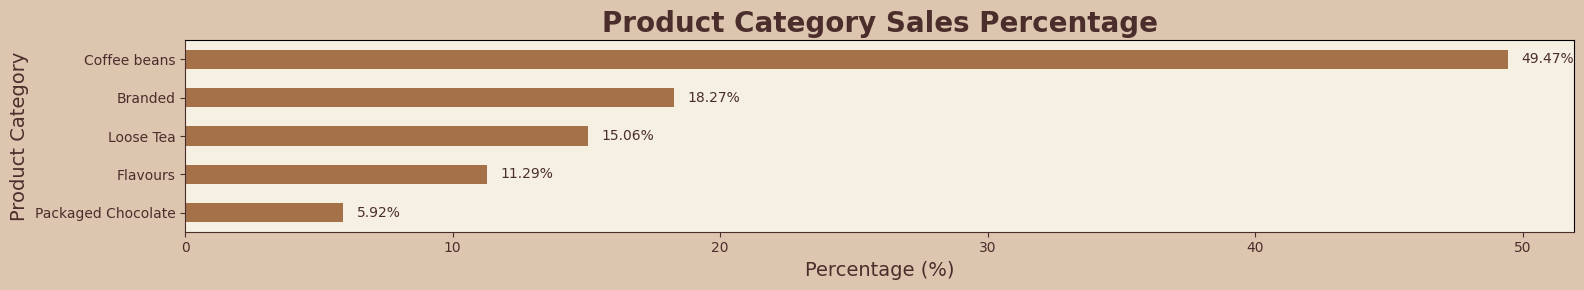

In [ ]:
category_sales = data.groupby('product_category')['Total_Bill'].sum().sort_values(ascending=True).head(5)
category_percentage = (category_sales / category_sales.sum()) * 100

plt.figure(figsize=(16, 3))

ax = category_percentage.plot(kind='barh', color='#A47149')

for index, value in enumerate(category_percentage):
    ax.text(value + 0.5, index, f'{value:.2f}%', va='center', ha='left', fontsize=10, color="#4B2E2B")

plt.title('Product Category Sales Percentage', fontsize=20, fontweight='bold', color="#4B2E2B")
plt.xlabel('Percentage (%)', fontsize=14, color="#4B2E2B")
plt.ylabel('Product Category', fontsize=14, color="#4B2E2B")

ax.tick_params(axis='x', colors="#4B2E2B")
ax.tick_params(axis='y', colors="#4B2E2B")
ax.spines['bottom'].set_color("#4B2E2B")
ax.spines['left'].set_color("#4B2E2B")
ax.set_facecolor("#F5F0E1")

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.tight_layout()
plt.show()


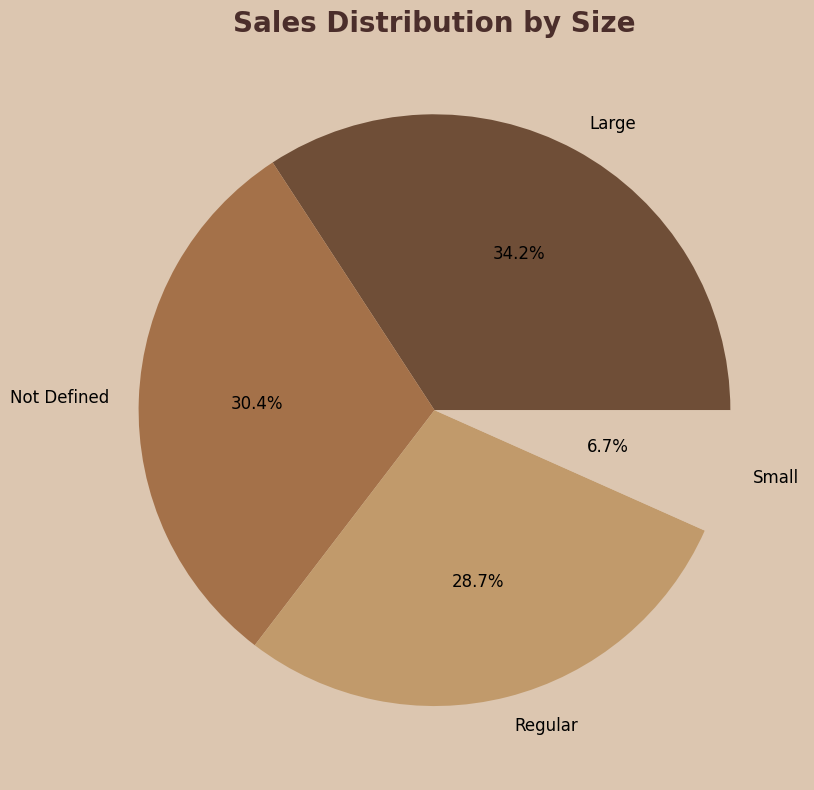

In [ ]:
category_sales = data.groupby("Size")["Total_Bill"].sum()

coffee_colors = ["#6F4E37", "#A47149", "#C19A6B", "#DCC6B0", "#8B5E3C", "#4B2E2B"]

plt.figure(figsize=(12, 8))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct="%1.1f%%",
    colors=coffee_colors[:len(category_sales)],
    textprops={'color': '#000000', 'fontsize': 12}
)

plt.title("Sales Distribution by Size", fontsize=20, color="#4B2E2B", fontweight="bold")
plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")
plt.tight_layout()
plt.show()


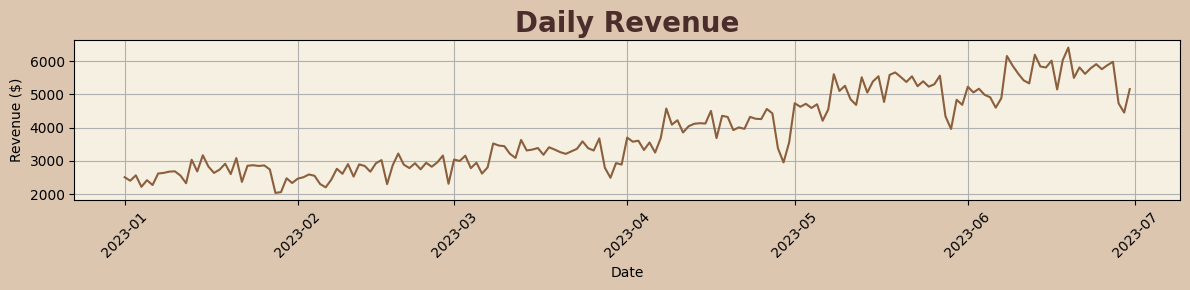

In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], dayfirst=True)
daily_revenue = data.groupby("transaction_date")["Total_Bill"].sum().sort_index()

plt.figure(figsize=(12, 3))
plt.plot(daily_revenue, color="#8B5E3C")
plt.title("Daily Revenue", fontsize=20, color="#4B2E2B", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.grid(True)
plt.tight_layout()
plt.show()

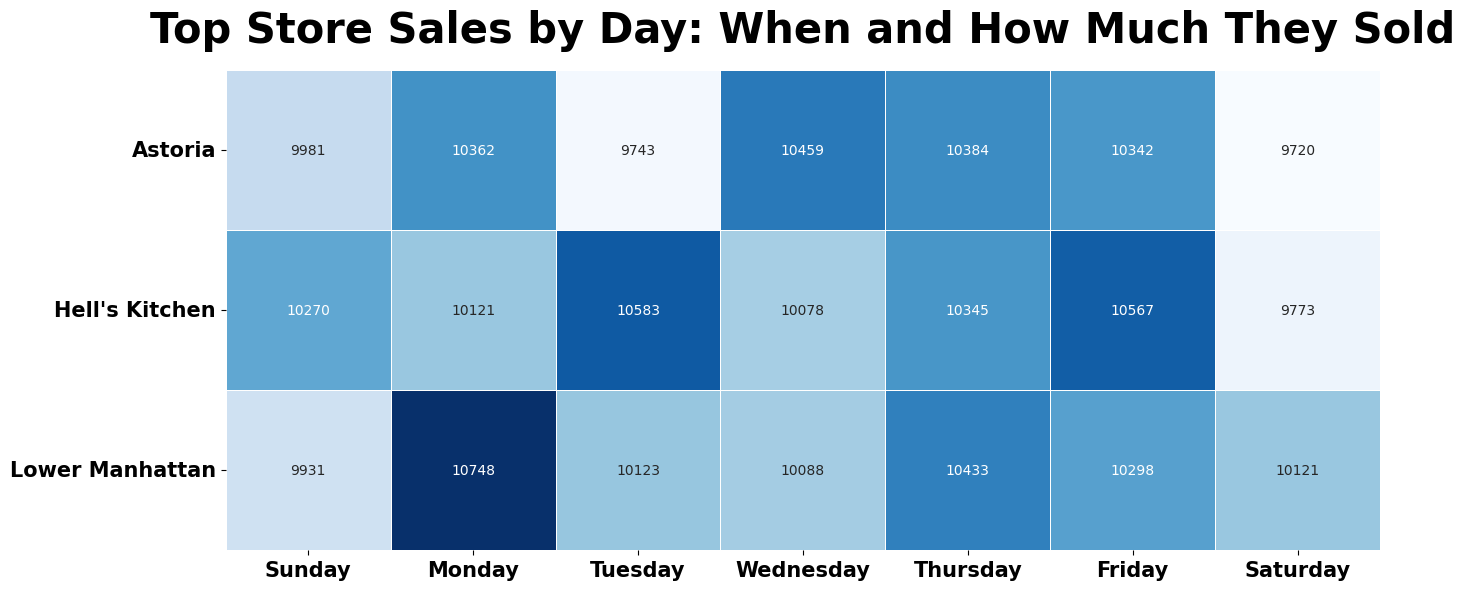

In [ ]:
heatmap_data5 = data.pivot_table(index="store_location", columns="Day Name", values="transaction_qty", aggfunc="sum", fill_value=0, observed=False)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data5,annot=True,fmt="d",cmap="Blues",linewidths=0.5,cbar=False)
plt.xticks(fontsize=15, fontweight='bold', rotation=0, color="#000000")
plt.yticks(fontsize=15, fontweight='bold', rotation=0, color="#000000")
plt.title("Top Store Sales by Day: When and How Much They Sold", fontsize=30, fontweight='bold', color="#000000", y=1.04)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

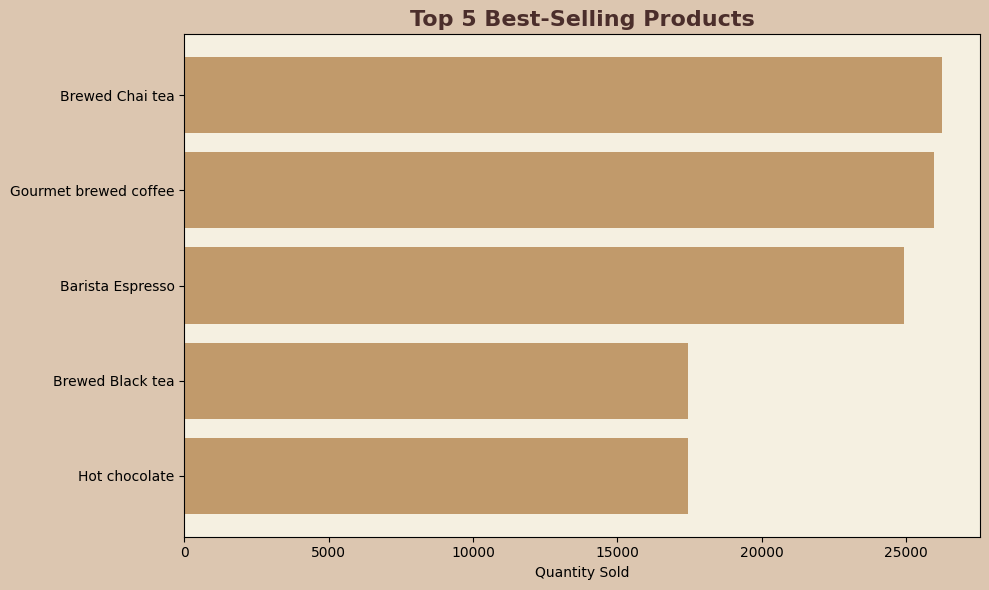

In [ ]:
top_products = data.groupby("product_type")["transaction_qty"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_products.index[::-1], top_products.values[::-1], color="#C19A6B")
plt.title("Top 5 Best-Selling Products", fontsize=16, color="#4B2E2B", fontweight="bold")
plt.xlabel("Quantity Sold")

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.tight_layout()
plt.show()


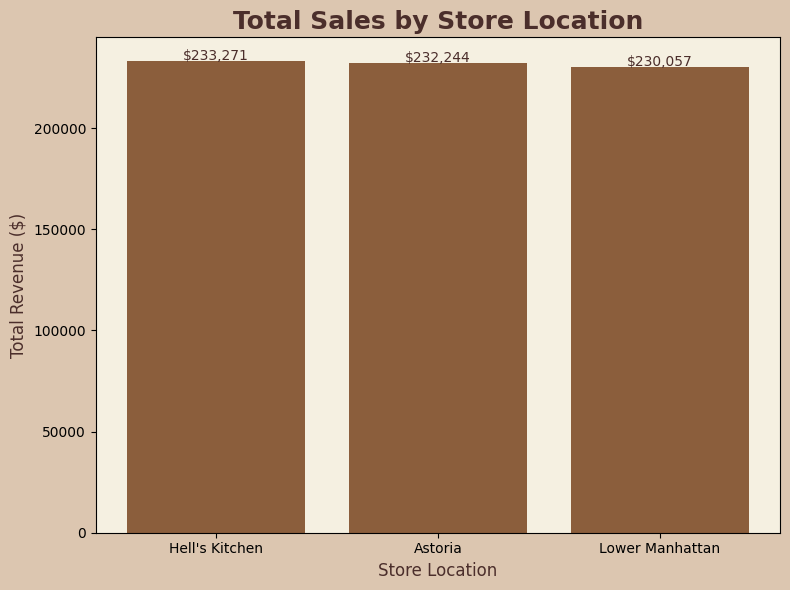

In [ ]:
location_sales = data.groupby("store_location")["Total_Bill"].sum().sort_values(ascending=False)

coffee_colors = ["#6F4E37", "#8B5E3C", "#A47149", "#C19A6B", "#DCC6B0"]

plt.figure(figsize=(8, 6))
plt.bar(location_sales.index, location_sales.values, color="#8B5E3C")

for i, value in enumerate(location_sales.values):
    plt.text(i, value + 500, f"${value:,.0f}", ha='center', fontsize=10, color="#4B2E2B")

plt.title("Total Sales by Store Location", fontsize=18, fontweight="bold", color="#4B2E2B")
plt.xlabel("Store Location", fontsize=12, color="#4B2E2B")
plt.ylabel("Total Revenue ($)", fontsize=12, color="#4B2E2B")

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.tight_layout()
plt.show()


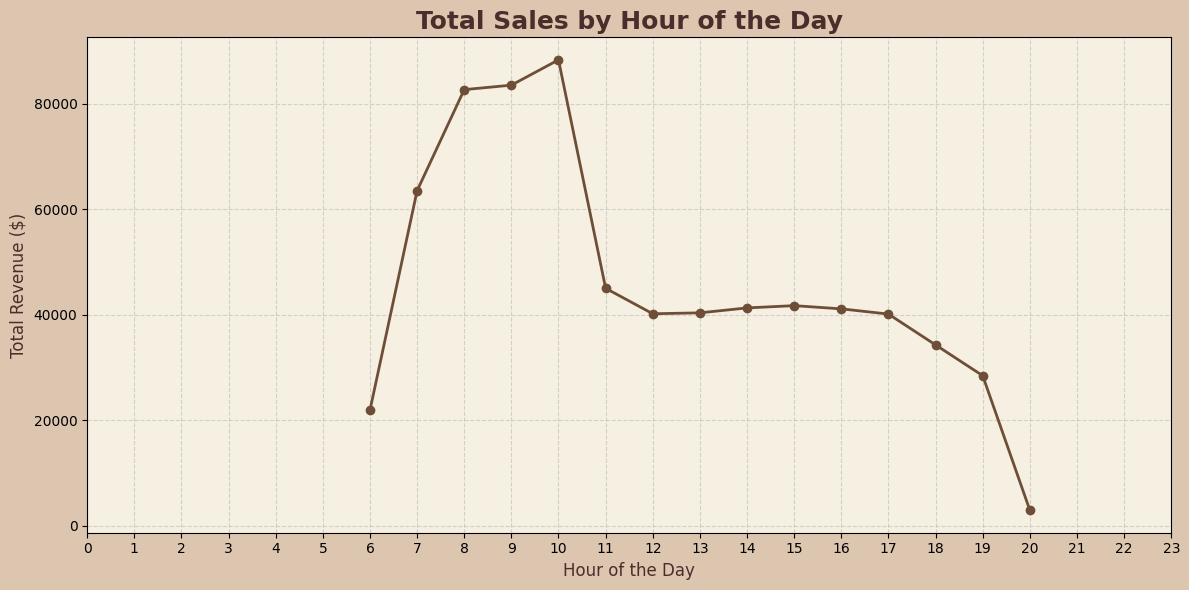

In [ ]:
hourly_sales = data.groupby("Hour")["Total_Bill"].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o", color="#6F4E37", linewidth=2)
plt.title("Total Sales by Hour of the Day", fontsize=18, fontweight="bold", color="#4B2E2B")
plt.xlabel("Hour of the Day", fontsize=12, color="#4B2E2B")
plt.ylabel("Total Revenue ($)", fontsize=12, color="#4B2E2B")
plt.xticks(range(0, 24))

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

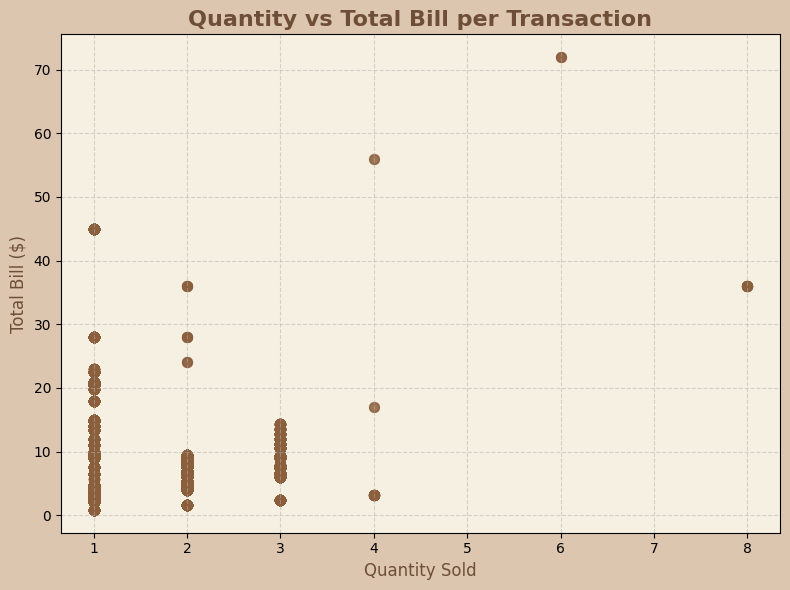

In [ ]:
x = data["transaction_qty"]
y = data["Total_Bill"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y,
            alpha=0.6,
            s=50,
            color=coffee_colors[1])

plt.title("Quantity vs Total Bill per Transaction",
          fontsize=16, fontweight="bold", color=coffee_colors[0])
plt.xlabel("Quantity Sold", fontsize=12, color=coffee_colors[0])
plt.ylabel("Total Bill ($)", fontsize=12, color=coffee_colors[0])

plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")

plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

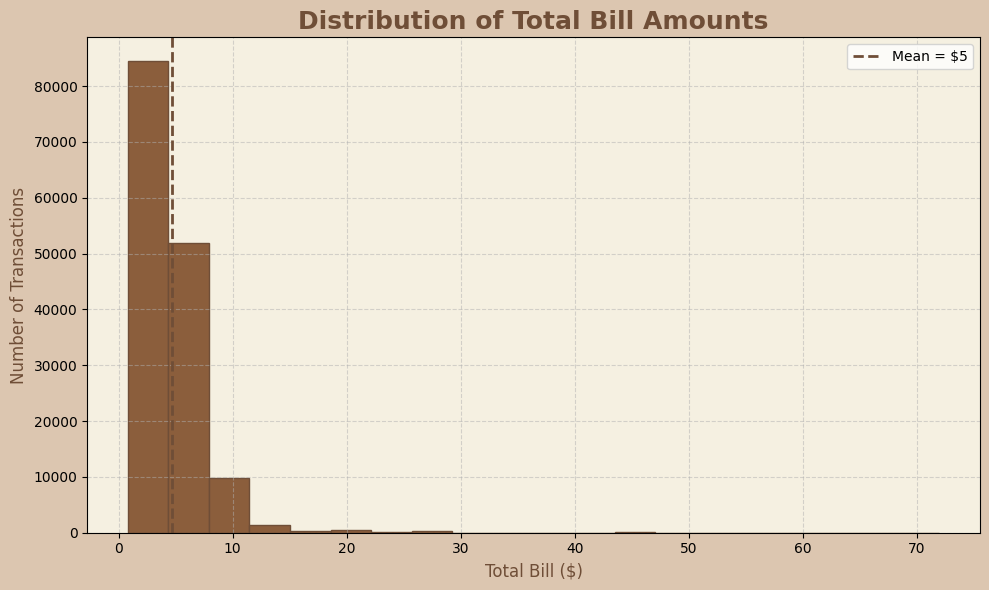

In [ ]:
values = data["Total_Bill"]

bins = 20

plt.figure(figsize=(10, 6))
plt.hist(values, bins=bins, color=coffee_colors[1], edgecolor=coffee_colors[0], linewidth=1)

mean_val = values.mean() # garis mean
plt.axvline(mean_val, linestyle='--', color=coffee_colors[0], linewidth=2, label=f"Mean = ${mean_val:,.0f}")

plt.title("Distribution of Total Bill Amounts", fontsize=18, fontweight="bold", color=coffee_colors[0])
plt.xlabel("Total Bill ($)",fontsize=12, color=coffee_colors[0])
plt.ylabel("Number of Transactions",fontsize=12, color=coffee_colors[0])

plt.legend()
plt.gca().set_facecolor("#F5F0E1")
plt.gcf().patch.set_facecolor("#DCC6B0")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# **Kesimpulan:**

> Kode ini memberikan analisis komprehensif terhadap data penjualan kopi. Dengan visualisasi data yang beragam, kode ini membantu dalam mengidentifikasi tren penjualan, produk populer, kinerja toko, dan aspek ekonomi penting lainnya. Informasi ini dapat digunakan untuk pengambilan keputusan bisnis, seperti strategi pemasaran, penge



